In [2]:

import numpy as np
import yfinance as yf
import pandas as pd

In [3]:

# Download Apple stock data
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2024-01-01"
apple_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:

# Convert to pandas dataframe and rename columns
apple_data = apple_data.reset_index()
apple_data.columns = ["Date", "Open", "High",
                      "Low", "Close", "Volume", "Adj Close"]

In [5]:
# Ensure date format
apple_data["Date"] = pd.to_datetime(apple_data["Date"])

In [6]:
# Daily Return and Daily Percent Change
apple_data["Daily_Return"] = apple_data["Close"].diff()
apple_data["Daily_Percent_Change"] = (
    apple_data["Close"] / apple_data["Close"].shift(1) - 1) * 100

In [7]:
apple_data.loc[0, "Daily_Return"] = 0.0000
apple_data.loc[0, "Daily_Percent_Change"] = 0.0000

In [8]:

# Moving Averages (SMA)
apple_data["MA_50"] = apple_data["Close"].rolling(window=50).mean()
apple_data["MA_100"] = apple_data["Close"].rolling(window=100).mean()
apple_data["MA_200"] = apple_data["Close"].rolling(window=200).mean()

In [9]:
apple_data['MA_50'] = apple_data['MA_50'].fillna(0)
apple_data['MA_100'] = apple_data['MA_100'].fillna(0)
apple_data['MA_200'] = apple_data['MA_200'].fillna(0)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adf_test_close = adfuller(apple_data["Close"])
print(f'ADF Test Statistic: {adf_test_close[0]}')
print(f'ADF p-value: {adf_test_close[1]}')
print(f'ADF Critical Value:')
for key, value in adf_test_close[4].items():
    print(f'{key}: {value}')

ADF Test Statistic: 0.8198709204450152
ADF p-value: 0.9919502443702507
ADF Critical Value:
1%: -3.4322181411264308
5%: -2.8623654387500004
10%: -2.5672093953423065


In [12]:
adf_test_daily_return = adfuller(apple_data["Daily_Return"])
print(f'ADF Test Statistic: {adf_test_daily_return[0]}')
print(f'ADF p-value: {adf_test_daily_return[1]}')
print(f'ADF Critical Value:')
for key, value in adf_test_daily_return[4].items():
    print(f'{key}: {value}')

ADF Test Statistic: -13.594272079145034
ADF p-value: 2.0090652565209125e-25
ADF Critical Value:
1%: -3.432217607589796
5%: -2.862365203080607
10%: -2.5672092698787816


In [13]:
adf_test_Daily_Percent_Change = adfuller(apple_data["Daily_Percent_Change"])
print(f'ADF Test Statistic: {adf_test_Daily_Percent_Change[0]}')
print(f'ADF p-value: {adf_test_Daily_Percent_Change[1]}')
print(f'ADF Critical Value:')
for key, value in adf_test_Daily_Percent_Change[4].items():
    print(f'{key}: {value}')

ADF Test Statistic: -12.295333142883704
ADF p-value: 7.662087433054731e-23
ADF Critical Value:
1%: -3.43221974356695
5%: -2.8623661465665307
10%: -2.5672097721632654


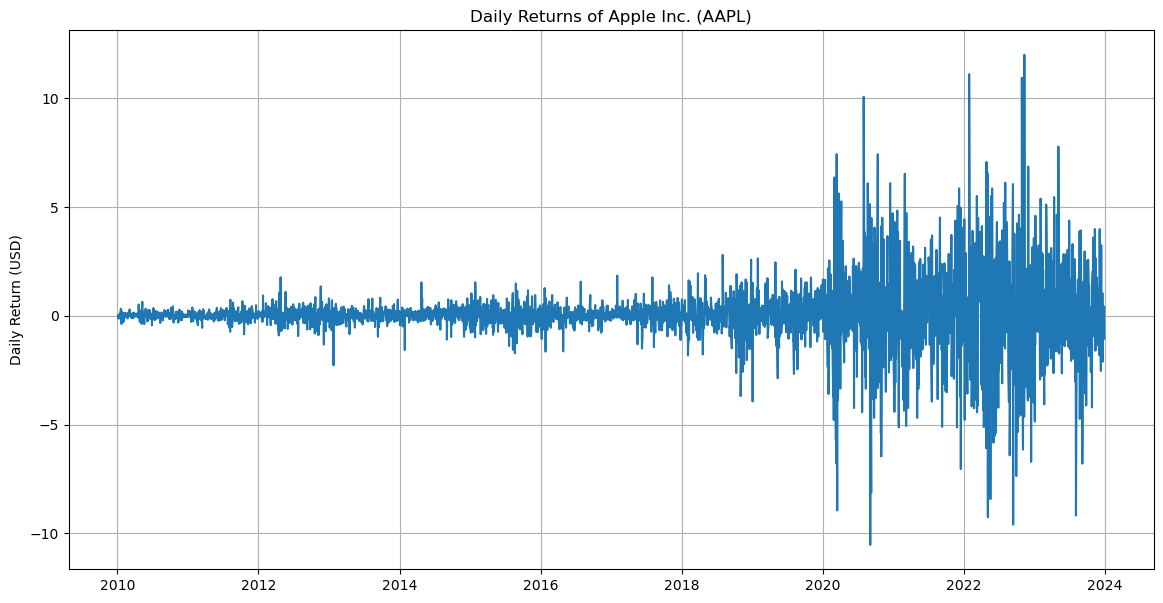

In [14]:
import matplotlib.pyplot as plt

# Plot Daily Return and Daily Percent Change
plt.figure(figsize=(14, 7))
plt.plot(apple_data["Date"], apple_data["Daily_Return"])
plt.title("Daily Returns of Apple Inc. (AAPL)")
plt.ylabel("Daily Return (USD)")
plt.grid(True)

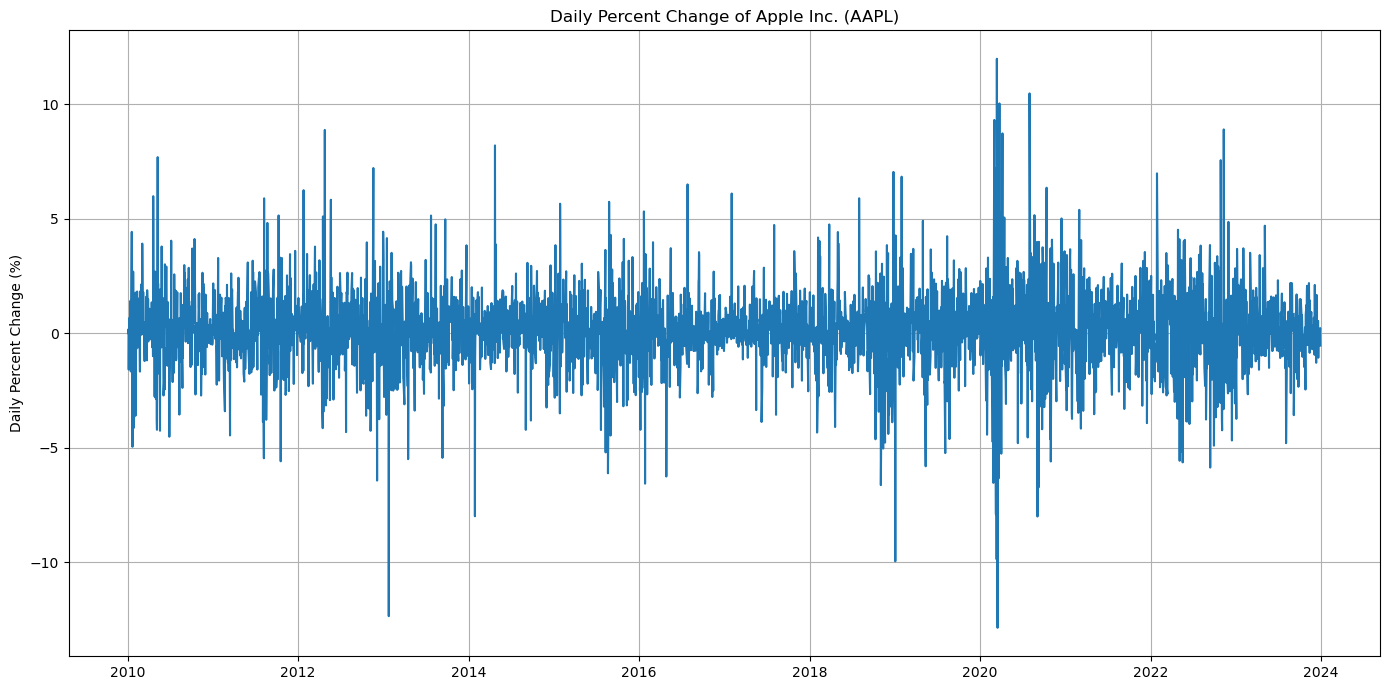

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(apple_data["Date"], apple_data["Daily_Percent_Change"])
plt.title("Daily Percent Change of Apple Inc. (AAPL)")
plt.ylabel("Daily Percent Change (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

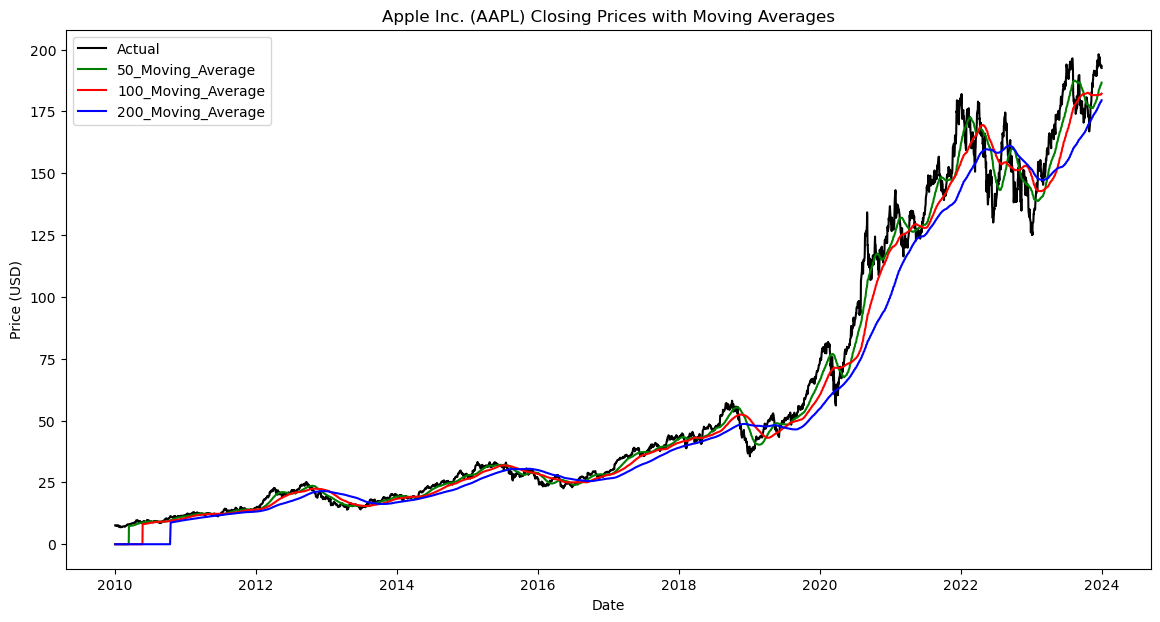

In [16]:

plt.figure(figsize=(14, 7))

# Plotting the actual closing prices
plt.plot(apple_data['Date'], apple_data['Close'],
         label='Actual', color='black')

# Plotting the moving averages
plt.plot(apple_data['Date'], apple_data['MA_50'],
         label='50_Moving_Average', color='green')
plt.plot(apple_data['Date'], apple_data['MA_100'],
         label='100_Moving_Average', color='red')
plt.plot(apple_data['Date'], apple_data['MA_200'],
         label='200_Moving_Average', color='blue')

# Adding title and labels
plt.title('Apple Inc. (AAPL) Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

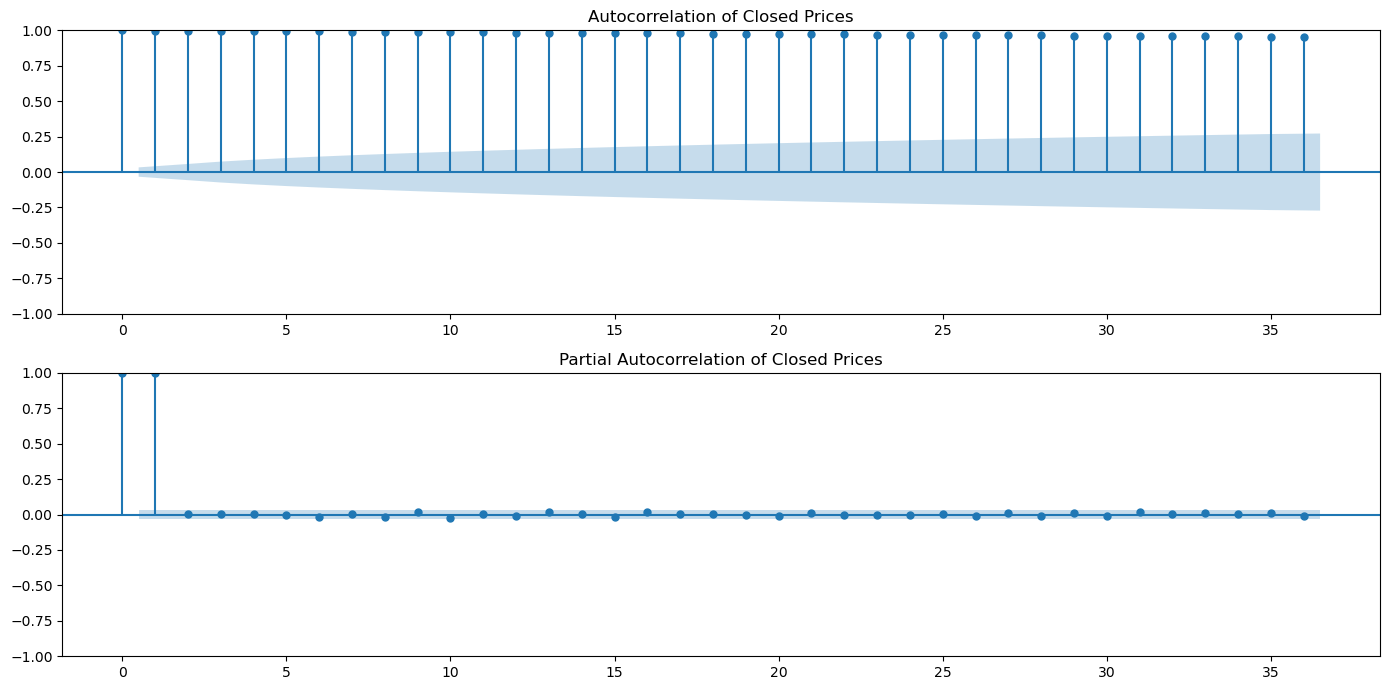

In [18]:
# Plot ACF and PACF for 'Close'
fig, ax = plt.subplots(2, 1, figsize=(14, 7))

plot_acf(apple_data['Close'], ax=ax[0])
ax[0].set_title('Autocorrelation of Closed Prices')

plot_pacf(apple_data['Close'], ax=ax[1])
ax[1].set_title('Partial Autocorrelation of Closed Prices')

plt.tight_layout()
plt.show()

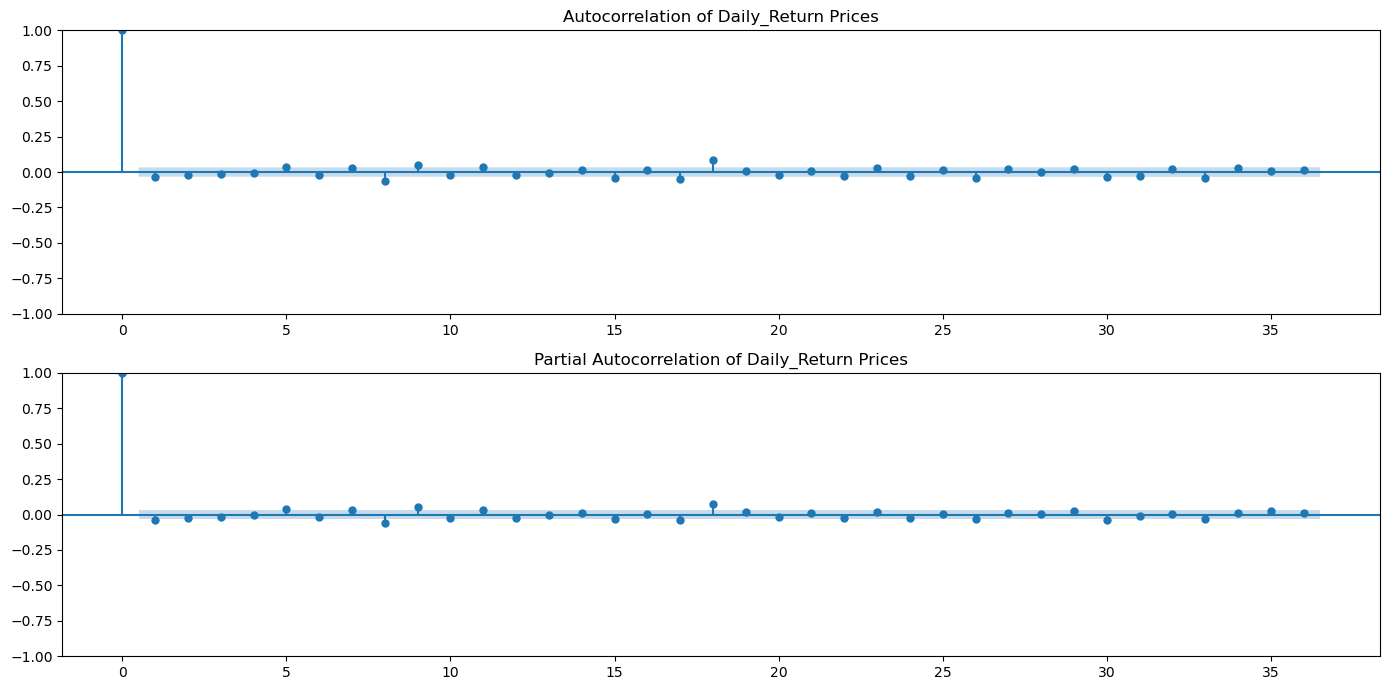

In [19]:
# Plot ACF and PACF for 'Daily_Return'
fig, ax = plt.subplots(2, 1, figsize=(14, 7))

plot_acf(apple_data['Daily_Return'], ax=ax[0])
ax[0].set_title('Autocorrelation of Daily_Return Prices')

plot_pacf(apple_data['Daily_Return'], ax=ax[1])
ax[1].set_title('Partial Autocorrelation of Daily_Return Prices')

plt.tight_layout()
plt.show()

In [20]:
# Filter the data
train_data = apple_data[apple_data['Date'] <= '2023-06-01']
test_data = apple_data[apple_data['Date'] > '2023-06-01']

# Get the size of the training data
train_size = len(train_data)

In [21]:
from pmdarima import auto_arima

arima_model = auto_arima(train_data['Close'])

In [22]:
# Find the order of the ARIMA model
p, d, q = arima_model.order

# Print the values of p, d, and q
print(f"p (AR order): {p}")
print(f"d (Differencing order): {d}")
print(f"q (MA order): {q}")

p (AR order): 1
d (Differencing order): 1
q (MA order): 1


In [154]:
n_periods = len(test_data)

# Generate predictions
forecast_result = arima_model.predict(
    n_periods=n_periods, return_conf_int=True)
forecast, conf_int = forecast_result

In [155]:
arima_predictions = pd.DataFrame({
    'Date': test_data['Date'],
    'forecast': forecast,
    'lower_conf_int': conf_int[:, 0],
    'upper_conf_int': conf_int[:, 1]
})

# Print the forecast DataFrame
print(arima_predictions)

           Date    forecast  lower_conf_int  upper_conf_int
3376 2023-06-02  179.942998      177.131333      182.754662
3377 2023-06-05  179.906664      176.040775      183.772554
3378 2023-06-06  179.919135      175.269527      184.568744
3379 2023-06-07  179.953129      174.648944      185.257313
3380 2023-06-08  179.996614      174.116078      185.877149
...         ...         ...             ...             ...
3517 2023-12-22  186.974023      156.802381      217.145665
3518 2023-12-26  187.024996      156.747613      217.302380
3519 2023-12-27  187.075969      156.693212      217.458727
3520 2023-12-28  187.126943      156.639175      217.614710
3521 2023-12-29  187.177916      156.585499      217.770333

[146 rows x 4 columns]


In [156]:
arima_rmse = np.sqrt(np.mean((forecast - test_data['Close'])**2))
print(f"ARIMA RMSE: {arima_rmse}")

ARIMA RMSE: 8.158331443516103


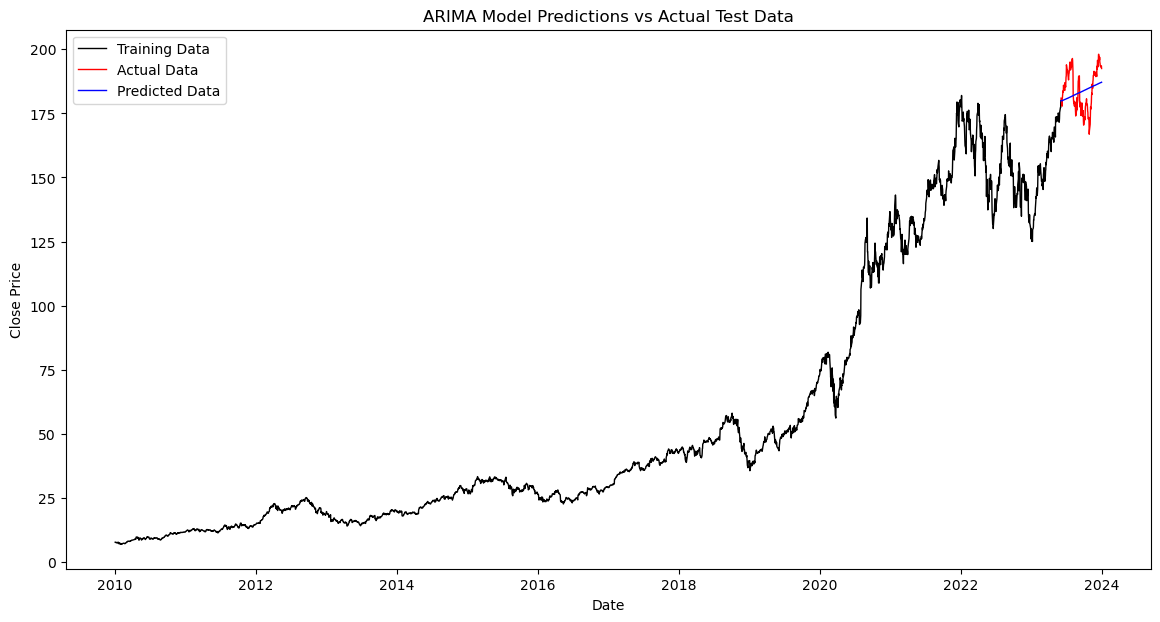

In [157]:
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_data['Date'], train_data['Close'],
         label='Training Data', color='black', linewidth=1)

# Plot actual test data
plt.plot(test_data['Date'], test_data['Close'],
         label='Actual Data', color='red', linewidth=1)

# Plot predicted data
plt.plot(arima_predictions['Date'], arima_predictions['forecast'],
         label='Predicted Data', color='blue', linewidth=1)

# Add title and labels
plt.title('ARIMA Model Predictions vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show plot
plt.show()

In [158]:
# Prepare the training and test data
Prophet_train_data = apple_data[apple_data['Date']
                                <= '2023-06-01'][['Date', 'Close']]
Prophet_test_data = apple_data[apple_data['Date']
                               > '2023-06-01'][['Date', 'Close']]

In [159]:
Prophet_train_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [160]:
from prophet import Prophet
Prophet_model = Prophet(yearly_seasonality=True,
                        weekly_seasonality=True,
                        daily_seasonality=False,
                        seasonality_mode='additive',
                        seasonality_prior_scale=40,
                        changepoint_prior_scale=0.003)
Prophet_model.fit(Prophet_train_data)

13:44:48 - cmdstanpy - INFO - Chain [1] start processing
13:44:48 - cmdstanpy - INFO - Chain [1] done processing


In [161]:
future = Prophet_model.make_future_dataframe(periods=len(Prophet_test_data))
forecast = Prophet_model.predict(future)

In [162]:
from sklearn.metrics import mean_squared_error

prophet_forecast = forecast['yhat'].iloc[len(Prophet_train_data):].values
prophet_rmse = np.sqrt(mean_squared_error(
    Prophet_test_data['Close'], prophet_forecast))
print(f"Prophet RMSE: {prophet_rmse}")

Prophet RMSE: 10.544738116340977


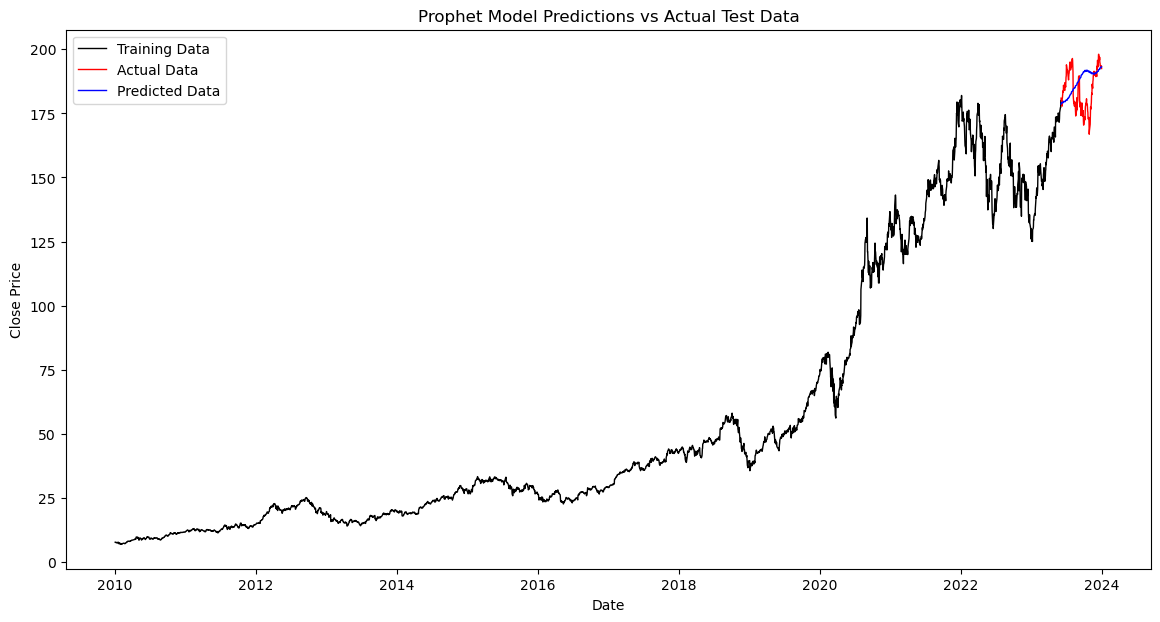

In [163]:
plot_data = Prophet_test_data.copy()
plot_data['predicted'] = prophet_forecast
plot_data.rename(columns={'Close': 'actual'}, inplace=True)

# Plot the predictions with the test data
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_data['Date'], train_data['Close'],
         label='Training Data', color='black', linewidth=1)

# Plot actual test data
plt.plot(plot_data['Date'], plot_data['actual'],
         label='Actual Data', color='red', linewidth=1)

# Plot predicted data
plt.plot(plot_data['Date'], plot_data['predicted'],
         label='Predicted Data', color='blue', linewidth=1)

# Add title and labels
plt.title('Prophet Model Predictions vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show plot
plt.show()

In [164]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [165]:
lstm_data = apple_data[['Date', 'Close']]

In [166]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_data['Close'].values.reshape(-1, 1))

In [167]:
# Split the data into training and test sets based on the specified date
lstm_train_data = apple_data[apple_data['Date'] <= '2023-06-01']
lstm_test_data = apple_data[apple_data['Date'] > '2023-06-01']

In [168]:
# Scale the data
scaled_train_close_data = scaler.fit_transform(
    lstm_train_data['Close'].values.reshape(-1, 1))
scaled_test_close_data = scaler.transform(
    lstm_test_data['Close'].values.reshape(-1, 1))

In [169]:
# Create a dataset function
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [170]:
# Reshape into X=t and Y=t+1
time_step = 30
X_train, y_train = create_dataset(scaled_train_close_data, time_step)
X_test, y_test = create_dataset(scaled_test_close_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [171]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

/Users/vignesh/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0021


In [172]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [173]:

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 2.7602735737434254
Test RMSE: 4.632779983526811


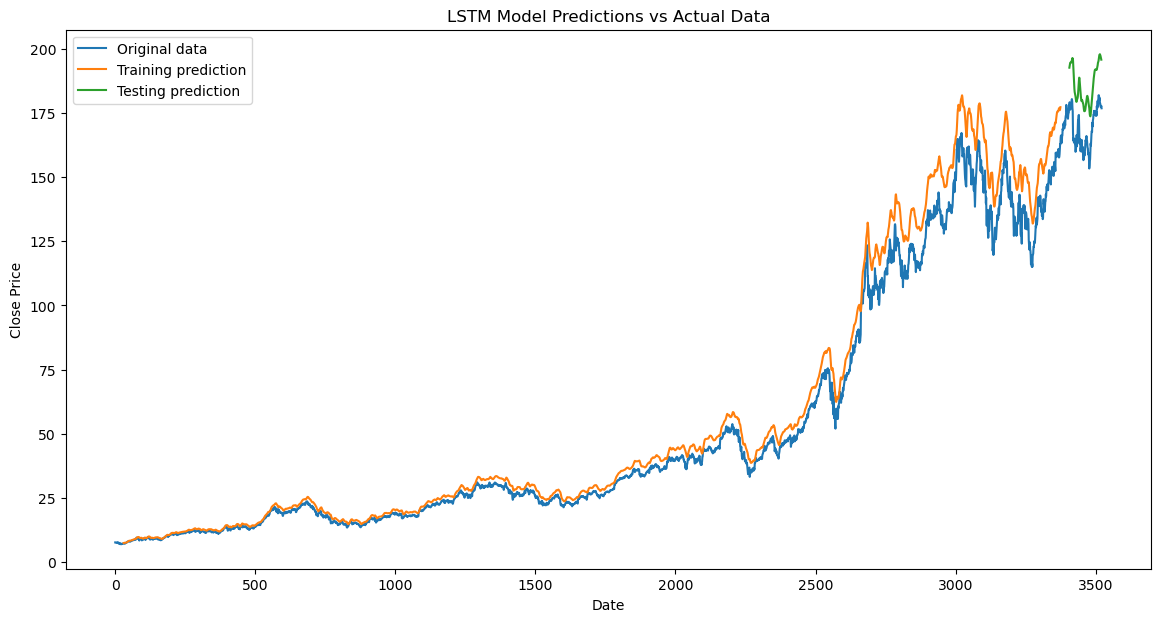

In [174]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot training data
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Plot testing data
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) +
          (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(scaled_data), label='Original data')
plt.plot(train_plot, label='Training prediction')
plt.plot(test_plot, label='Testing prediction')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Model Predictions vs Actual Data')
plt.legend()
plt.show()

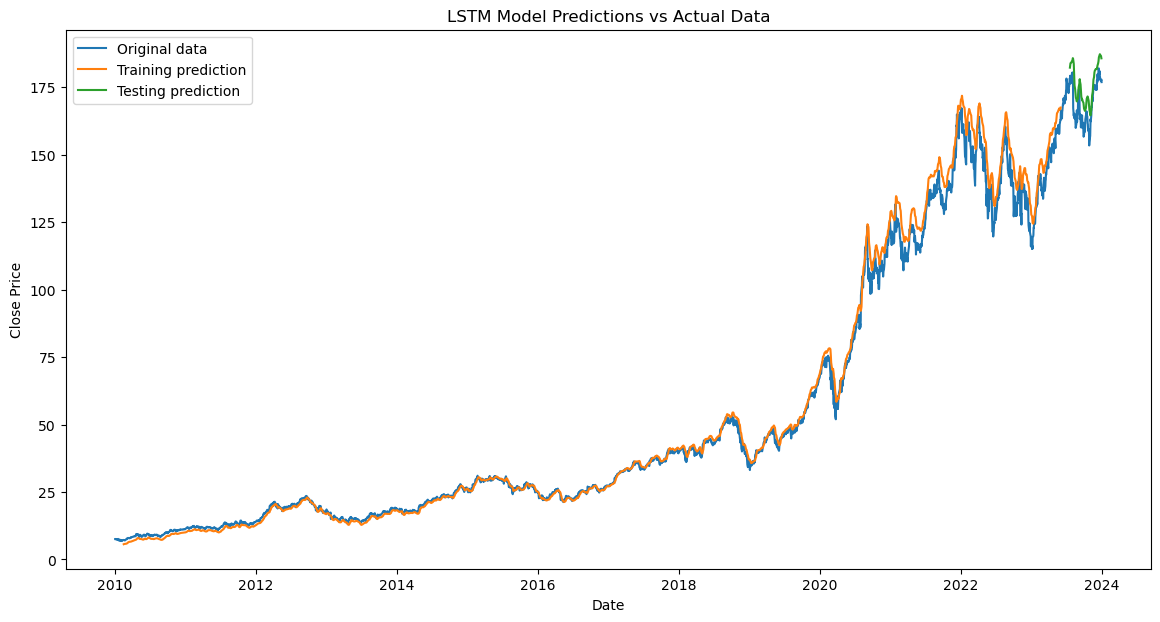

In [89]:
# Plot the results
plt.figure(figsize=(14, 7))

# Prepare training data for plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Prepare testing data for plotting
test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) +
          1:len(scaled_data) - 1, :] = test_predict

# Plot baseline and predictions
plt.plot(lstm_data['Date'], scaler.inverse_transform(
    scaled_data), label='Original data')
plt.plot(lstm_data['Date'], train_plot, label='Training prediction')
plt.plot(lstm_data['Date'], test_plot, label='Testing prediction')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Model Predictions vs Actual Data')
plt.legend()
plt.show()